In [32]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Conv2D,MaxPool2D,Dropout,Flatten,Dense,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping, ModelCheckpoint
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot 

In [2]:
#define the important variables
IMAGE_SIZE = (64, 64)
Epochs=20
lr=0.01

In [8]:
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2
                                      )
test_datagen = ImageDataGenerator(rescale = 1./255)
train_gen = datagen.flow_from_directory('../input/files1/Malaria Cells/training_set',
                                                     target_size=(64,64),
                                                     batch_size=128,
                                                     class_mode = 'binary')



Found 27558 images belonging to 2 classes.


In [7]:
val_gen = test_datagen.flow_from_directory('../input/files1/Malaria Cells/testing_set',
                                                     target_size=(64,64),
                                                     batch_size=128,
                                                     class_mode = 'binary')

Found 15832 images belonging to 2 classes.


In [9]:
#define the model 
def make_model():
    model=Sequential()
    model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(500,activation="relu"))
    model.add(Dense(1,activation="sigmoid"))

    model.compile(optimizer ='adam',loss = 'binary_crossentropy',metrics = ['accuracy']) # compiling the model
    return model

In [10]:
model=make_model()


In [11]:
# define the callbacks functions
my_callbacks = [EarlyStopping(monitor = 'val_loss', min_delta = 0.001, 
                                  patience = 3, mode = 'min', verbose = 1),
                ModelCheckpoint(filepath='model.h5', 
                                    save_best_only = True, 
                                    monitor = 'val_loss', 
                                    mode = 'min', verbose = 1),
                ReduceLROnPlateau(monitor='val_loss',
                                      factor=0.1,
                                      patience=2, 
                                      min_lr=0.00001,
                                      mode='min',
                                      verbose=1)]

In [12]:
#define the training steps and validations step for training
steps_per_epoch = train_gen.n//train_gen.batch_size
validation_steps = val_gen.n//val_gen.batch_size    

In [13]:
history = model.fit(train_gen,steps_per_epoch=steps_per_epoch,validation_steps=validation_steps,
                              validation_data = val_gen,
                              epochs = Epochs, 
                              callbacks =my_callbacks)

Epoch 1/20
215/215 [==============================] - 354s 2s/step - loss: 0.6564 - accuracy: 0.6072 - val_loss: 0.3731 - val_accuracy: 0.8544

Epoch 00001: val_loss improved from inf to 0.37312, saving model to model.h5
Epoch 2/20
215/215 [==============================] - 81s 377ms/step - loss: 0.3429 - accuracy: 0.8666 - val_loss: 0.1814 - val_accuracy: 0.9333

Epoch 00002: val_loss improved from 0.37312 to 0.18143, saving model to model.h5
Epoch 3/20
215/215 [==============================] - 81s 376ms/step - loss: 0.2414 - accuracy: 0.9116 - val_loss: 0.1644 - val_accuracy: 0.9470

Epoch 00003: val_loss improved from 0.18143 to 0.16442, saving model to model.h5
Epoch 4/20
215/215 [==============================] - 81s 377ms/step - loss: 0.2223 - accuracy: 0.9229 - val_loss: 0.1529 - val_accuracy: 0.9493

Epoch 00004: val_loss improved from 0.16442 to 0.15286, saving model to model.h5
Epoch 5/20
215/215 [==============================] - 81s 379ms/step - loss: 0.2168 - accuracy: 0.

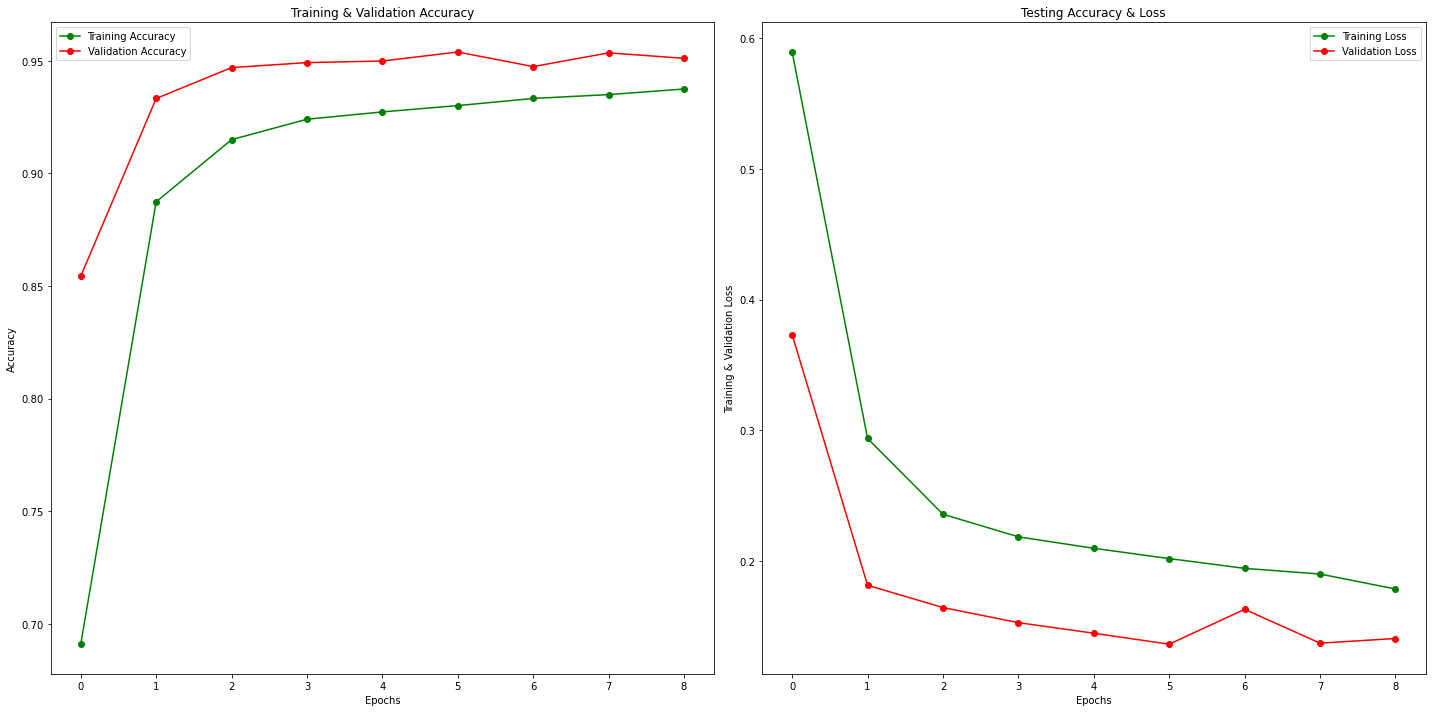

In [16]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
        
epochs = [i for i in range(0,9)]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.set_size_inches(20,10)

ax1.plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax1.plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax1.set_title('Training & Validation Accuracy')
ax1.legend()
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax2.plot(epochs , loss , 'g-o' , label = 'Training Loss')
ax2.plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax2.set_title('Testing Accuracy & Loss')
ax2.legend()
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Training & Validation Loss")
       
fig.tight_layout()
plt.show()

In [53]:
img=image.load_img('../input/files1/Malaria Cells/training_set/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_25.png',target_size=(64,64))

In [54]:
x=image.img_to_array(img)
x=x/255

In [55]:
image_1 = x.reshape((1, x.shape[0], x.shape[1], x.shape[2]))

In [56]:
model.predict(image_1)

array([[0.9872665]], dtype=float32)